In [948]:
#Importing pandas
import pandas as pd

In [949]:
#Defining the absolute path to the file
fp = r"/home/jovyan/my-work/exercises/Final-exercise/data/2315676.txt"

In [952]:
#Reading the data using pandas and renaming NaN values
data = pd.read_csv(
    fp,
    skiprows=[1],
    delim_whitespace=True,
    na_values= "-9999",
    
)

In [953]:
#Checking the data head
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


In [954]:
#Checking the data tail
data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201007,47.0,50.0,44.0


In [955]:
#Checking how many missing values there are in the columns
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
STATION             0
STATION_NAME        0
DATE                0
TAVG            19843
TMAX              769
TMIN             1946
dtype: int64


In [956]:
#Creating an empty column for temperature averages (in Fahr)
data["TEMP_F"] = 0.0

#Calculating the average temperature
data["TEMP_F"] = (data["TMAX"] + data["TMIN"]) /2

In [957]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0


In [958]:
#Checking how many missing values there are now in the columns
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
STATION             0
STATION_NAME        0
DATE                0
TAVG            19843
TMAX              769
TMIN             1946
TEMP_F           2623
dtype: int64


In [959]:
#Filling TAVG column missing values with TEMP_F column values
data["TAVG"] = data["TAVG"].fillna(data["TEMP_F"])

In [960]:
#Checking how many missing values there are now in the columns
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
STATION            0
STATION_NAME       0
DATE               0
TAVG             183
TMAX             769
TMIN            1946
TEMP_F          2623
dtype: int64


In [961]:
#Removing the rows with missing values from TAVG
data.dropna(subset=["TAVG"], inplace=True)

In [962]:
#Defining the function

def fahr_to_celsius(temp_fahrenheit):
    converted_temp = (temp_fahrenheit - 32) / 1.8
    return converted_temp

In [963]:
#Testing the function works 
fahr_to_celsius(32)

0.0

In [964]:
#Creating an empty column for average temperatures in Celsius called TAVG_C
data["TAVG_C"] = 0.0

In [965]:
#Renaming TAVG to avoid confusion
new_name= {"TAVG": "TAVG_F"}
data= data.rename(columns=new_name)

In [966]:
data.head()

,STATION,STATION_NAME,DATE,TAVG_F,TMAX,TMIN,TEMP_F,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,0.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,0.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,0.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,0.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,0.0


In [967]:
#Applying the function
for i, row in data.iterrows():

    #Converting Fahrenheit to Celsius
    celsius = fahr_to_celsius(row["TAVG_F"])

    #Updating the value of TAVG_C column with the converted value
    data.at[i, "TAVG_C"] = celsius

In [968]:
#Checking the data
data.head()

,STATION,STATION_NAME,DATE,TAVG_F,TMAX,TMIN,TEMP_F,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-26.666667


In [969]:
#Converting to string
data["TIME_STR"] = data["DATE"].astype(str)

#Converting DATE column to datetime
data["TIME"] = pd.to_datetime(data["TIME_STR"])

data["TIME"].head()


#Extracting year and month from the DATE column

data["YEAR"] = data["TIME"].dt.year
data["MONTH"] = data["TIME"].dt.month


In [998]:
#Defining function to assign season based on month
def assign_season(month):
    if month == 12 or month == 1 or month == 2:
        return "Winter"
    elif month == 3 or month == 4 or month == 5:
        return "Spring"
    elif month == 6 or month == 7 or month == 8:
        return "Summer"
    elif month == 9 or month == 10 or month == 11:
        return "Autumn"

data["SEASON"] = data["MONTH"].apply(assign_season)

In [999]:
#Checking the number of seasons
data["SEASON"].nunique()

4

In [1000]:
#Calculating the average seasonal temperatures by grouping
seasonal_avg_temp = data.groupby(["YEAR", "SEASON"])["TAVG_C"].mean().reset_index()

In [1001]:
seasonal_avg_temp.head()

,YEAR,SEASON,TAVG_C
0,1908,Autumn,-1.859217
1,1908,Spring,-2.346743
2,1908,Summer,11.425926
3,1908,Winter,-12.330779
4,1909,Autumn,-0.155827


In [1002]:
#Setting the reference period and calculating seasonal average from reference period
ref_period = seasonal_avg_temp[(seasonal_avg_temp["YEAR"] >= 1951) & (seasonal_avg_temp["YEAR"] <= 1980)]
ref_seasonal_avg = ref_period.groupby("SEASON")["TAVG_C"].mean().reset_index()
ref_seasonal_avg.columns = ["SEASON", "REF_TAVG_C"]


In [1003]:
ref_seasonal_avg

,SEASON,REF_TAVG_C
0,Autumn,-0.816010
1,Spring,-2.338516
2,Summer,12.400262
3,Winter,-13.553475


In [1004]:
#Calculating seasonal temperature anomalies per year
seasonal_avg_temp = seasonal_avg_temp.merge(ref_seasonal_avg, on="SEASON")
seasonal_avg_temp["ANOMALY"] = seasonal_avg_temp["TAVG_C"] - seasonal_avg_temp["REF_TAVG_C"]

In [1005]:
seasonal_avg_temp.head()

,YEAR,SEASON,TAVG_C,REF_TAVG_C,ANOMALY
0,1908,Autumn,-1.859217,-0.81601,-1.043207
1,1909,Autumn,-0.155827,-0.81601,0.660183
2,1910,Autumn,-1.742063,-0.81601,-0.926054
3,1911,Autumn,-1.279150,-0.81601,-0.463140
4,1912,Autumn,-2.073413,-0.81601,-1.257403


In [1006]:
#Separating DataFrames for each season
winter_data = seasonal_avg_temp[seasonal_avg_temp['SEASON'] == 'Winter'].reset_index(drop=True)
spring_data = seasonal_avg_temp[seasonal_avg_temp['SEASON'] == 'Spring'].reset_index(drop=True)
summer_data = seasonal_avg_temp[seasonal_avg_temp['SEASON'] == 'Summer'].reset_index(drop=True)
autumn_data = seasonal_avg_temp[seasonal_avg_temp['SEASON'] == 'Autumn'].reset_index(drop=True)

In [1007]:
#Importing matplotlib

import matplotlib.pyplot as plt

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

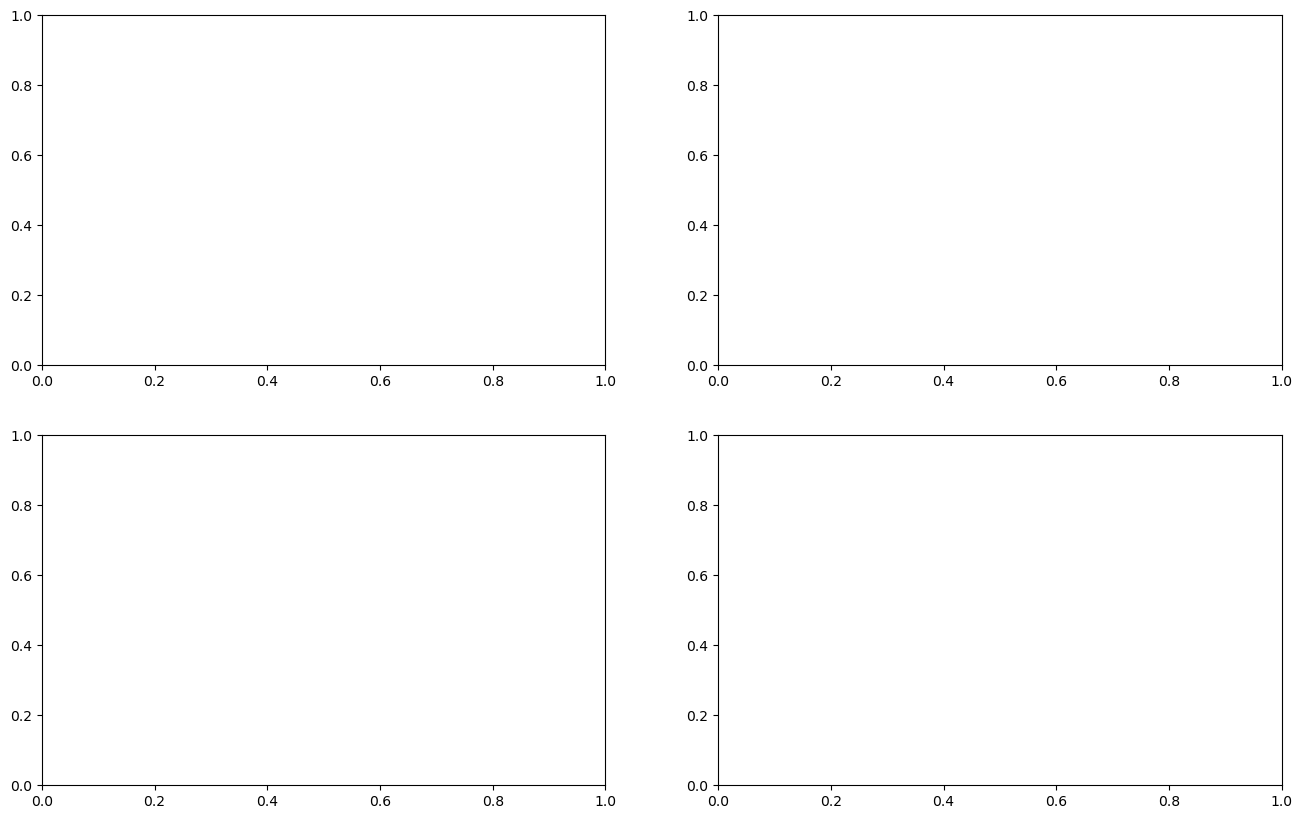

In [1008]:
#Creating 4 figures, 2 per row in 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes

In [1009]:
#Naming the axes into own variables
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

In [1010]:
#Making a list of years 
years= winter_data["YEAR"].tolist()

In [1011]:
#Making lists of anomalies 
anomalies1= winter_data["ANOMALY"].tolist()

In [1012]:
anomalies2=spring_data["ANOMALY"].tolist()

In [1013]:
anomalies3= summer_data["ANOMALY"].tolist()

In [1014]:
anomalies4= autumn_data["ANOMALY"].tolist()

In [1015]:

#Plotting the anomalies
ax11.plot(years, anomalies1, 'ro--', label='Winter')
ax12.plot(years, anomalies2, 'go--', label='Spring')
ax21.plot(years, anomalies3, 'bo--', label='Summer')
ax22.plot(years, anomalies4, 'yo--', label='Autumn')


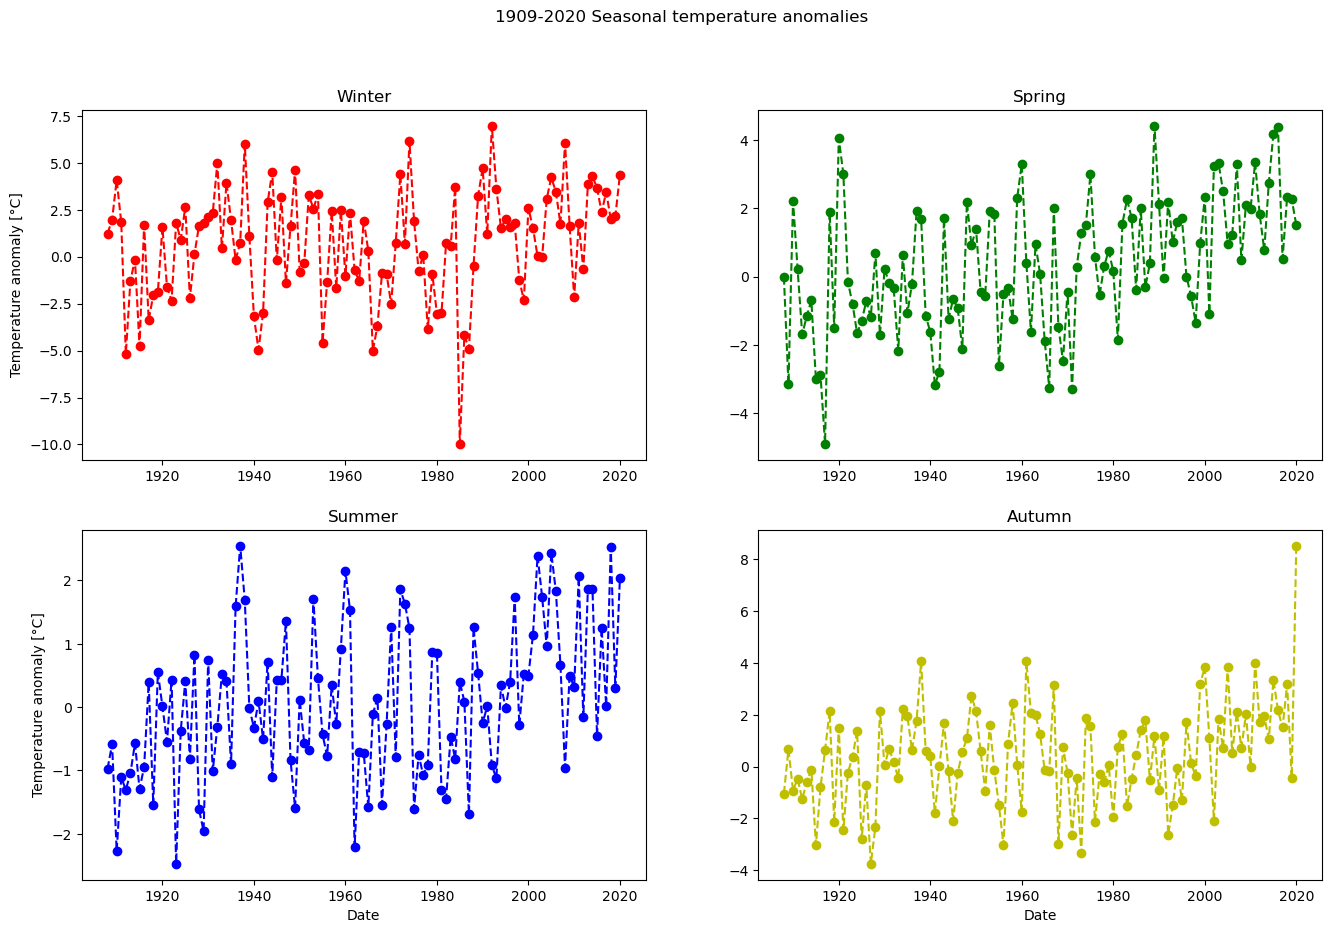

In [1016]:
#Setting figure title
fig.suptitle("1909-2020 Seasonal temperature anomalies")

#Axis labels
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")
ax11.set_ylabel("Temperature anomaly [°C]")
ax21.set_ylabel("Temperature anomaly [°C]")

#Season label text
ax11.set_title("Winter")
ax12.set_title("Spring")
ax21.set_title("Summer")
ax22.set_title("Autumn")

#Displaying plot
fig


Acknowledgements:

Use of AI tools


I have used AI in some parts of the exercise. Rather than prompts, I have asked ChatGPT questions to enhance my understanding. 

I asked from ChatGPT how to fill missing values from another column using fillna- function, and ChatGPT explained. I used some parts of the code. 

Next problem I had was how to group in seasons. I asked ChatGPT and learned assign_season function from there. The function did not work perfectly, so I managed to use conditionals like a for loop.
The last part of code I used from ChatGPT data["SEASON"] = data["MONTH"].apply(assign_season)

I also asked help how to set the reference period and calculate averages from that, but I wrote the codes on my own.

Last part was challenging, so I discussed with my friend who has coded before. She suggested for me that I do lists of years and anomalies, because I couldn't use the columns "YEAR" and "ANOMALY".

My last question for ChatGPT was: 
"I have a list of years and four lists of anomalies, I want to create four different plots for different seasons (with same x axis and different y axis)." to get an idea how could I use the lists in creating plots.

Otherwise I used coursematerials.